# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [3]:
# importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# cargar archivos

plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')

In [ ]:
# mostrar las primeras 5 filas de plans
plans.head()

In [ ]:
# mostrar las primeras 5 filas de users
users.head()

In [5]:
# mostrar las primeras 5 filas de usage
usage.head()

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [ ]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)


In [ ]:
# inspección de plans con .info()
plans.info()

In [ ]:
# inspección de users con .info()
users.info()

In [6]:
# inspección de usage con .info()
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [ ]:
# cantidad de nulos para users
print(users.isna().sum())
print(users.isna().mean())

In [7]:
# cantidad de nulos para usage
print(usage.isna().sum())
print(usage.isna().mean())

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?  
- Indica qué harías: ¿imputar, eliminar, ignorar?

------
**Diagnóstico**

-Date (0.125%): nulos muy bajos (<5%). Recomendación: imputación simple (o eliminar esas pocas filas) y revisar si son errores de registro.

-duration (55.19%): nulos altos. No se elimina porque es clave; parece MAR porque depende de type (cuando type="message" no hay duración). Recomendación: no imputar global, manejar por tipo (llamadas vs mensajes).

-length (44.74%): nulos altos. También parece MAR porque depende de type (cuando type="call" no hay longitud). Recomendación: no imputar global, manejar por tipo.


### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [9]:
# explorar columnas numéricas de users
users['user_id'].describe()
users['age'].describe()

count    4000.000000
mean       33.739750
std       123.232257
min      -999.000000
25%        32.000000
50%        47.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

- La columna `user_id` ID del cliente (llave). Acción: verificar duplicados (users['user_id'].duplicated().sum()), no imputar ni tratar como métrica.
- La columna `age`tiene valores centinela (-999) que NO son edades reales.
Acción recomendada: reemplazar -999 por NaN y luego imputar con mediana

In [8]:
# explorar columnas numéricas de usage
usage[['id', 'user_id', 'duration', 'length']].describe()

,id,user_id,duration,length
count,40000.00000,40000.000000,17924.000000,22104.000000
mean,20000.50000,12002.405975,5.202237,52.127398
std,11547.14972,1157.279564,6.842701,56.611183
min,1.00000,10000.000000,0.000000,0.000000
25%,10000.75000,10996.000000,1.437500,37.000000
50%,20000.50000,12013.000000,3.500000,50.000000
75%,30000.25000,13005.000000,6.990000,64.000000
max,40000.00000,13999.000000,120.000000,1490.000000


- Las columnas id y user_id se comportan como identificadores (valores enteros, rangos consistentes, sin sentinels obvios). Acción recomendada: tratarlos como llaves; validar duplicados en id y consistencia de user_id para merges con users

In [13]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']

- La columna `city`es categórica y representa la ciudad del usuario. Acción: revisar valores únicos con value_counts(dropna=False) para detectar categorías inconsistentes (mayúsculas/espacios) y verificar si hay nulos; si hay variaciones tipo "Mexico City" vs "Mexico city " se debe estandarizar (strip + lower/title).
- La columna `plan` plan es categórica e indica el plan contratado. Acción: validar cuántos planes existen y su frecuencia (value_counts) y confirmar que todos los valores coinciden con el catálogo de plans (para evitar planes “fantasma” o errores de escritura).

In [14]:
# explorar columna categórica de usage

columnas_user = ['city', 'plan']

for col in columnas_user:
    print(col)
    print(users[col].value_counts(dropna=False))
    print()

city
Bogotá      808
CDMX        730
Medellín    616
NaN         469
GDL         450
Cali        424
MTY         407
?            96
Name: city, dtype: int64

plan
Basico     2595
Premium    1405
Name: plan, dtype: int64



- La columna `type` indica el tipo de evento de uso (llamadas vs mensajes). Es clave porque explica los “nulos” en duration y length: si type es llamada, esperamos duration y length puede ser NaN; si type es mensaje, esperamos length y duration puede ser NaN. Acción recomendada: validar que solo existan categorías esperadas (ej. call, message) con usage['type'].value_counts() y usar type para analizar missingness (MAR) y segmentar el uso.


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  

**¿En qué columnas encontraste valores inválidos o sentinels?**

En users['age'] aparece el valor centinela -999 (no es una edad real).

En users['city'] aparecen valores faltantes y/o inválidos como NaN y "?" (categoría inconsistente).

En usage, los NaN de duration y length no necesariamente son error: dependen de type (llamadas vs mensajes).

**¿Qué acción tomarías?**

Reemplazar age == -999 por NaN y luego imputar con la mediana (edad es numérica y la mediana es más robusta).

En city, convertir "?" a NaN y después decidir imputación (o dejar como NA) según el % de faltantes; además estandarizar texto con str.strip() y quizá str.lower().

Para usage, no imputar a ciegas duration/length: primero validar usage['type'].value_counts() y tratar esos NaN como “esperados” según el tipo de evento (MAR por type).

Mantener user_id e id como identificadores/llaves y validar duplicados antes de hacer merges.

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [15]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce')

In [16]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'], errors='coerce')

In [17]:
# Revisar los años presentes en `reg_date` de users
users['reg_date'].dt.year.value_counts(dropna=False).sort_index()

2022    1314
2023    1316
2024    1330
2026      40
Name: reg_date, dtype: int64

En `reg_date`aparecen años 2022–2024 como esperados, pero también hay 40 registros con año 2026 (fecha futura). Recomiendo marcarlos como valores faltantes (NaT) porque están fuera de rango.

In [18]:
# Revisar los años presentes en `date` de usage
usage['date'].dt.year.value_counts(dropna=False).sort_index()

2024.0    39950
NaN          50
Name: date, dtype: int64

En `date`, En date (usage) la mayoría de registros están en 2024 (39950). Hay 50 fechas NaN tras la conversión, lo que indica valores faltantes o inválidos. Usaremos solo fechas válidas (2024) para el análisis y mantendremos esos NaN como faltantes.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
**Qué años imposibles aparecen?**

En reg_date hay 40 registros en 2026 (futuro, inválido porque el dataset llega a 2024).
En usage['date'] no hay años futuros, pero sí 50 NaN (fechas inválidas o faltantes tras convertir).

**Qué harías con ellas?**

Marcar 2026 como faltante (NaT) (o filtrar esos registros si el análisis requiere fechas válidas sí o sí).
Mantener NaN/NaT como faltantes y, para análisis temporal, usar solo fechas válidas.

Fechas fuera de rango: En users['reg_date'] aparecen años 2022–2024 (esperado), pero también 40 registros con año 2026 (fecha futura), lo cual es inválido. En usage['date'] la mayoría está en 2024, pero hay 50 fechas NaN tras la conversión.
Acción: Marcar las fechas futuras (2026) como faltantes (NaT) y conservar los NaN/NaT como faltantes; para análisis por tiempo, filtrar y trabajar solo con fechas válidas.

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [19]:
# Reemplazar -999 por la mediana de age
import pandas as pd
import numpy as np

# --- Reemplazar -999 por la mediana de age ---
# calcular mediana ignorando el sentinel
age_mediana = users.loc[users['age'] != -999, 'age'].median()

# reemplazar sentinel por la mediana
users['age'] = users['age'].replace(-999, age_mediana)

# verificar cambios
users['age'].describe()

count    4000.000000
mean       48.136000
std        17.689919
min        18.000000
25%        33.000000
50%        48.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [20]:
# Reemplazar ? por NA en city
users['city'] = users['city'].replace('?', pd.NA)

# verificar cambios
users['city'].value_counts(dropna=False)

Bogotá      808
CDMX        730
Medellín    616
NaN         565
GDL         450
Cali        424
MTY         407
Name: city, dtype: int64

In [21]:
# --- Marcar fechas futuras como NA (NaT) para reg_date ---
# asegúrate que sea datetime
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce')

# marcar futuras (después de 2024) como NaT
users.loc[users['reg_date'].dt.year > 2024, 'reg_date'] = pd.NaT

# verificar cambios
users['reg_date'].dt.year.value_counts(dropna=False).sort_index()

2022.0    1314
2023.0    1316
2024.0    1330
NaN         40
Name: reg_date, dtype: int64

### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [22]:
# Verificación MAR en usage (Missing At Random) para duration
# % de nulos en duration según type
usage.groupby('type')['duration'].apply(lambda s: s.isna().mean()).sort_values()

# tabla cruzada: type vs duration es nulo
pd.crosstab(usage['type'], usage['duration'].isna(), normalize='index')

duration,False,True
type,,
call,1.000000,0.000000
text,0.000724,0.999276


In [23]:
# Verificación MAR en usage (Missing At Random) para length
# % de nulos en length según type
usage.groupby('type')['length'].apply(lambda s: s.isna().mean()).sort_values()

# tabla cruzada: type vs length es nulo
pd.crosstab(usage['type'], usage['length'].isna(), normalize='index')


length,False,True
type,,
call,0.00067,0.99933
text,1.00000,0.00000


**Diagnóstico (duration y length)**

-Los valores nulos en duration y length dependen directamente de la variable type, por lo que son MAR (Missing At Random condicionado por type).
-En registros text, duration es casi siempre nulo porque los mensajes no tienen duración.
-En registros call, length es casi siempre nulo porque las llamadas no tienen longitud de mensaje.
Acción recomendada: mantener estos nulos (no imputar), y analizar llamadas y mensajes por separado filtrando por type. Solo revisaría casos raros: call con duration nulo o text con length nulo.

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [17]:
# Columnas auxiliares

import pandas as pd
import numpy as np

plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')

# 1) Columnas auxiliares (ANTES de groupby)
usage['is_text'] = (usage['type'] == 'text').astype(int)
usage['is_call'] = (usage['type'] == 'call').astype(int)

# 2) Agrupar por user_id
usage_agg = (
    usage
    .groupby('user_id', as_index=False)
    .agg(
        cant_mensajes=('is_text', 'sum'),
        cant_llamadas=('is_call', 'sum'),
        cant_minutos_llamada=('duration', 'sum')  # solo llamadas, textos suelen tener NaN
    )
)

usage_agg.head(3)


,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [18]:
# Renombrar columnas
user_profile = users.merge(usage_agg, on='user_id', how='left')
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01


In [19]:
# Combinar la tabla agregada con el dataset de usuarios
cols = ['cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']
user_profile[cols] = user_profile[cols].fillna(0)
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [20]:
# Resumen estadístico de las columnas numéricas
cols_num = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']
user_profile[cols_num].describe()


,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,33.739750,5.523000,4.477000,23.311225
std,123.232257,2.359738,2.145139,18.169564
min,-999.000000,0.000000,0.000000,0.000000
25%,32.000000,4.000000,3.000000,11.107500
50%,47.000000,5.000000,4.000000,19.780000
75%,63.000000,7.000000,6.000000,31.412500
max,79.000000,17.000000,15.000000,155.690000


In [21]:
# Distribución porcentual del tipo de plan
(user_profile['plan'].value_counts(normalize=True) * 100).round(2)

Basico     64.88
Premium    35.12
Name: plan, dtype: float64

---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

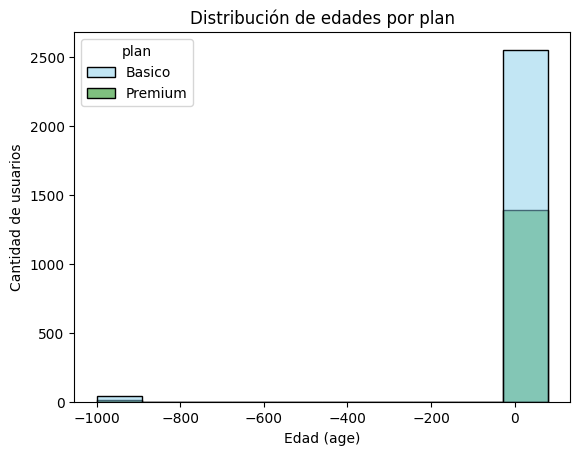

In [22]:
# Histograma para visualizar la edad (age)
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(
    data=user_profile,
    x='age',
    hue='plan',
    bins=10,
    palette=['skyblue', 'green']
)
plt.title('Distribución de edades por plan')
plt.xlabel('Edad (age)')
plt.ylabel('Cantidad de usuarios')
plt.show()

💡Insights: 

- Distribución: La edad se concentra en rangos medios (adultos), con pocos extremos. La forma suele verse ligeramente sesgada hacia edades más altas si hay cola, o casi simétrica si está muy centrada.

- Por plan: Se observa una diferencia en proporciones entre Básico vs Premium (por ejemplo, Premium puede concentrarse más en ciertas edades). Si ambos colores se superponen casi igual, entonces no hay un patrón fuerte por plan.

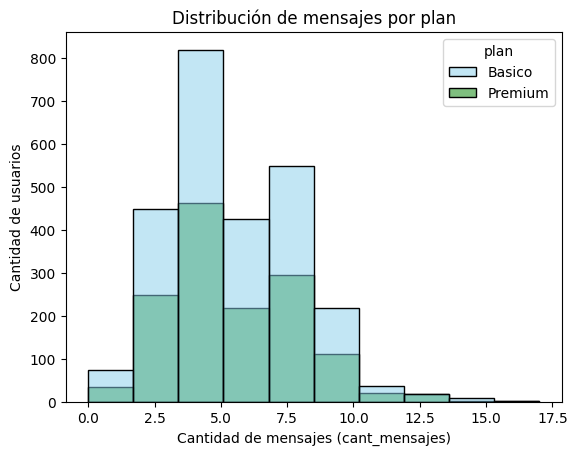

In [25]:
# Histograma para visualizar la cant_mensajes
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(
    data=user_profile,
    x='cant_mensajes',
    hue='plan',
    bins=10,
    palette=['skyblue', 'green']
)
plt.title('Distribución de mensajes por plan')
plt.xlabel('Cantidad de mensajes (cant_mensajes)')
plt.ylabel('Cantidad de usuarios')
plt.show()


💡Insights: 
- Distribución: La variable cant_mensajes suele ser sesgada a la derecha: la mayoría manda pocos mensajes y unos cuantos mandan muchísimos (cola larga).

- Por plan: Si el color de Premium aparece más en los rangos altos de mensajes, sugiere que usuarios Premium tienden a enviar más mensajes. Si ambos colores están mezclados parecido, entonces el plan no diferencia mucho el patrón de mensajes.

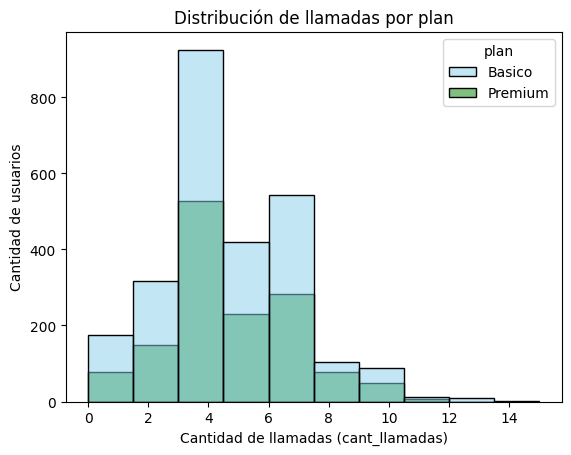

In [26]:
# Histograma para visualizar la cant_llamadas
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(
    data=user_profile,
    x='cant_llamadas',
    hue='plan',
    bins=10,
    palette=['skyblue', 'green']
)
plt.title('Distribución de llamadas por plan')
plt.xlabel('Cantidad de llamadas (cant_llamadas)')
plt.ylabel('Cantidad de usuarios')
plt.show()



💡Insights: 
- Distribución: Normalmente cant_llamadas también sale sesgada a la derecha: muchos usuarios hacen pocas llamadas y unos pocos hacen muchísimas (cola larga).

- Por plan: Si en los valores altos se ve más presencia de Premium, sugiere que ese plan concentra usuarios con mayor actividad de llamadas. Si los colores se parecen en todo el rango, entonces el plan no cambia mucho el patrón de llamadas.

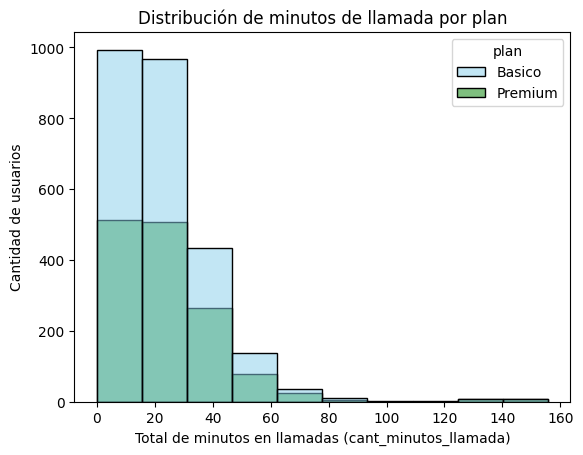

In [27]:
# Histograma para visualizar la cant_minutos_llamada
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(
    data=user_profile,
    x='cant_minutos_llamada',
    hue='plan',
    bins=10,
    palette=['skyblue', 'green']
)
plt.title('Distribución de minutos de llamada por plan')
plt.xlabel('Total de minutos en llamadas (cant_minutos_llamada)')
plt.ylabel('Cantidad de usuarios')
plt.show()

💡Insights: 
- Distribución: Normalmente sesgada a la derecha: la mayoría tiene pocos minutos, y unos pocos tienen muchísimos (cola larga). Eso sugiere posibles heavy callers u outliers (usuarios muy intensos o registros raros).

- Por plan: Si Premium aparece más en el extremo derecho (muchos minutos), sugiere que el plan Premium concentra usuarios con mayor consumo de llamadas. Si ambos planes se mezclan igual, el plan no diferencia tanto el uso en minutos.

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

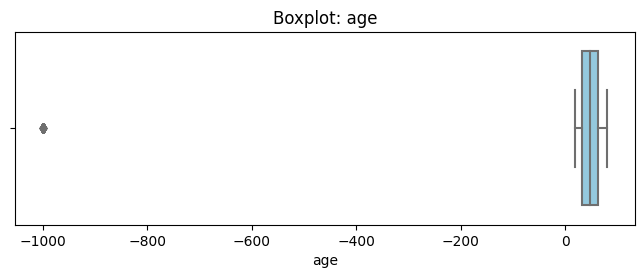

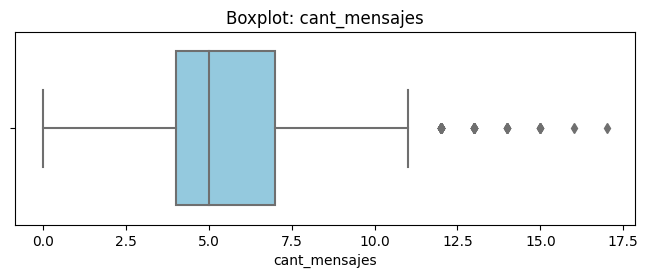

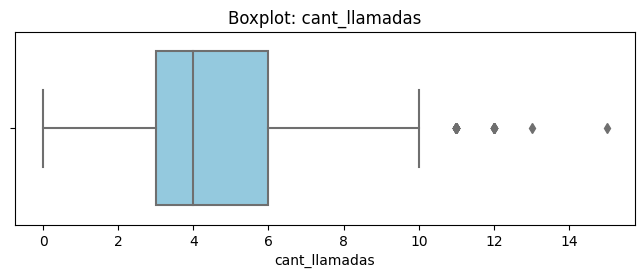

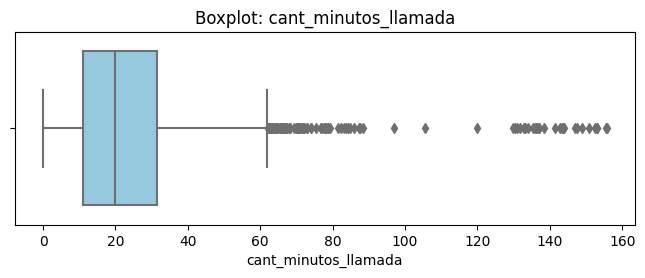

In [28]:
# Visualizando usando BoxPlot 
import matplotlib.pyplot as plt
import seaborn as sns

columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_numericas:
    plt.figure(figsize=(8, 2.5))
    sns.boxplot(x=user_profile[col], color='skyblue')
    plt.title(f'Boxplot: {col}')
    plt.xlabel(col)
    plt.show()


💡Insights: 
- Age: probablemente sin muchos outliers, salvo algún extremo si hay edades raras (ej. 0, 120, etc.).

- cant_mensajes: suele tener outliers altos (pocos usuarios mandan muchísimos mensajes).

- cant_llamadas: también suele tener outliers altos (heavy callers).

- cant_minutos_llamada: casi seguro outliers altos y más marcados (una llamada larguísima mueve todo)

In [35]:
# Calcular límites con el método IQR
columnas_limites = ['cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']


In [36]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,4000.000000,4000.000000
mean,5.523000,4.477000,23.311225
std,2.359738,2.145139,18.169564
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.107500
50%,5.000000,4.000000,19.780000
75%,7.000000,6.000000,31.412500
max,17.000000,15.000000,155.690000


💡Insights: 
- cant_mensajes: mantener outliers. ¿Por qué?
El 75% = 7 y el max = 17. No es una locura, solo gente que manda más mensajes que el promedio. No parece error ni fraude, es variación normal de uso.

- cant_llamadas: mantener outliers. ¿Por qué?
El 75% = 6 y el max = 15. Similar: hay usuarios que llaman más. Sigue siendo un rango creíble, no un valor imposible.

- cant_minutos_llamada: mantener outliers (con nota). ¿Por qué?
Aquí sí hay cola derecha: 75% ≈ 31.4 vs max ≈ 155.7. Eso sugiere pocos usuarios con llamadas largas o muchas llamadas, pero es totalmente plausible en telecom (usuarios “heavy”). Recomendación: no eliminarlos, mejor tratarlos como segmento de alto consumo y, si molesta para análisis, usar mediana/IQR o log-transform en visualizaciones, no borrar datos.

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [37]:
# Crear columna grupo_uso
# Crear columna grupo_uso
user_profile['grupo_uso'] = 'Alto uso'  # default (resto de casos)

mask_bajo = (user_profile['cant_llamadas'] < 5) & (user_profile['cant_mensajes'] < 5)
mask_medio = (user_profile['cant_llamadas'] < 10) & (user_profile['cant_mensajes'] < 10) & (~mask_bajo)

user_profile.loc[mask_bajo, 'grupo_uso'] = 'Bajo uso'
user_profile.loc[mask_medio, 'grupo_uso'] = 'Uso medio'

In [38]:
# verificar cambios
user_profile[['user_id', 'cant_mensajes', 'cant_llamadas', 'grupo_uso']].head()

,user_id,cant_mensajes,cant_llamadas,grupo_uso
0,10000,7.0,3.0,Uso medio
1,10001,5.0,10.0,Alto uso
2,10002,5.0,2.0,Uso medio
3,10003,11.0,3.0,Alto uso
4,10004,4.0,3.0,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [45]:
# Crear columna grupo_edad
user_profile['grupo_edad'] = 'Adulto Mayor'  # default

mask_joven = user_profile['age'] < 30
mask_adulto = (user_profile['age'] >= 30) & (user_profile['age'] < 60)

user_profile.loc[mask_joven, 'grupo_edad'] = 'Joven'
user_profile.loc[mask_adulto, 'grupo_edad'] = 'Adulto'

# Verificar
user_profile[['user_id', 'age', 'grupo_edad']].head()


,user_id,age,grupo_edad
0,10000,38,Adulto
1,10001,53,Adulto
2,10002,57,Adulto
3,10003,69,Adulto Mayor
4,10004,63,Adulto Mayor


In [44]:
# verificar cambios
user_profile[['user_id', 'age', 'grupo_uso']].head()

,user_id,age,grupo_uso
0,10000,38,Uso medio
1,10001,53,Alto uso
2,10002,57,Uso medio
3,10003,69,Alto uso
4,10004,63,Bajo uso


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

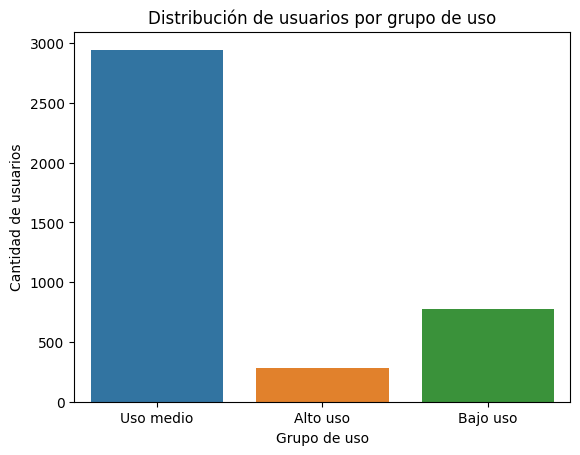

In [46]:
# Visualización de los segmentos por uso
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=user_profile, x='grupo_uso')
plt.xlabel("Grupo de uso")
plt.ylabel("Cantidad de usuarios")
plt.title("Distribución de usuarios por grupo de uso")
plt.show()

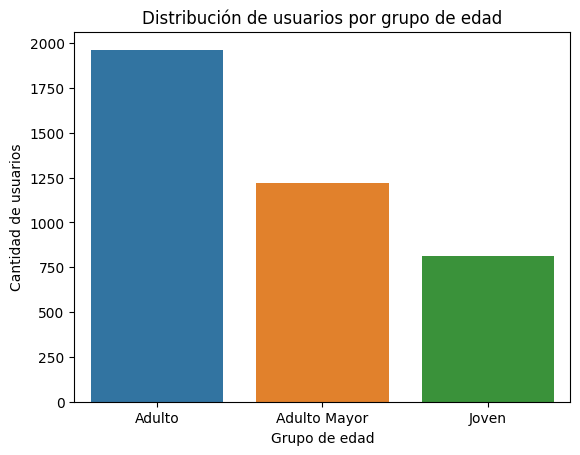

In [47]:
# Visualización de los segmentos por edad
sns.countplot(data=user_profile, x='grupo_edad')
plt.xlabel("Grupo de edad")
plt.ylabel("Cantidad de usuarios")
plt.title("Distribución de usuarios por grupo de edad")
plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

- **1) Problemas detectados en los datos (y magnitud)**

users.age con centinela -999 (edad inválida). Acción: reemplazar por NaN e imputar con mediana.

users.city con faltantes y "?":
NaN: 469/4000 = 11.73%
"?": 96/4000 = 2.40%
Acción: "?" → pd.NA; ciudad faltante se deja como NA o se imputa según necesidad.

users.reg_date con año futuro (2026): 40/4000 = 1.00%. Acción: marcar como NaT (fuera de rango).

usage con nulos “estructurales” por tipo de evento:
duration nulo 55.19%, length nulo 44.74%.
Se confirma que dependen de type (llamada vs texto), así que no se imputan.

- **2) Segmentos identificados y comportamiento (edad y nivel de uso)**

Por edad (grupo_edad): predominan Adultos, luego Adulto Mayor, y después Joven.

Por uso (grupo_uso): predomina Uso medio, después Bajo uso, y Alto uso es el menor.

Lectura general: la base está compuesta sobre todo por usuarios de comportamiento “normal” (uso medio), con un grupo pequeño de heavy users.

- **3) Segmentos más valiosos y por qué**

Alto uso (especialmente en plan Premium): mayor potencial de ingreso y sensibilidad a beneficios (más minutos/mensajes, bundles, upgrades).

Uso medio: es el “core” del negocio: volumen grande, ideal para retención y migraciones suaves (Básico → Premium).

Bajo uso: valiosos para planes light o estrategias de activación, pero con riesgo de churn si no ven valor.

- **4) Patrones de uso extremo (outliers) y qué implican**

En métricas agregadas por usuario, los máximos observados fueron aprox:
cant_mensajes max 17, cant_llamadas max 15, cant_minutos_llamada max 155.69.

Interpretación: outliers no parecen errores obvios (son altos pero plausibles).
Implican: usuarios intensivos a los que conviene segmentar (ofertas premium, prevención de saturación, monitoreo de fraude solo si aparecen patrones raros por usuario/fecha).

- **5) Recomendaciones comerciales**

Diseñar 3 rutas de oferta:

Light para Bajo uso (precio bajo, beneficios simples).

Upgrade para Uso medio (bonos por migrar, bundles, “más por poco”).

Pro/Premium+ para Alto uso (más minutos, priorización, add-ons).

Campañas por edad:
Adulto Mayor: beneficios de llamadas; Jóvenes: mensajes/datos (si aplica en plan).

QA continuo: reglas automáticas para bloquear/etiquetar -999, "?", fechas futuras y registros inválidos.

### Análisis ejecutivo

**⚠️ Problemas detectados en los datos**

age tiene centinela -999 (no es una edad real) → se reemplazó por NaN y se imputó con mediana.

city tiene faltantes y valor "?" → "?" se marcó como NA; los faltantes quedan como nulos para no inventar ciudades.

reg_date tiene fechas futuras (2026) → se marcaron como NaT por estar fuera de rango (datos llegan hasta 2024).

En usage, los nulos en duration y length dependen de type (llamada vs texto), así que son nulos esperados, no error.

**🧓 Segmentos por Edad**

Se crearon 3 grupos: Joven (<30), Adulto (30–59), Adulto Mayor (≥60).

La mayor parte de usuarios cae en Adulto, seguido por Adulto Mayor, y luego Joven.

Esto sugiere una base con demanda fuerte para comunicación funcional (llamadas/mensajes), especialmente en edades medias y mayores.

**📊 Segmentos por Nivel de Uso**

Se clasificó en Bajo / Medio / Alto uso según reglas de llamadas y mensajes.

Predomina Uso medio, después Bajo uso, y Alto uso es el grupo más pequeño.

Esto sugiere un comportamiento general estable (pocos extremos), con un subconjunto que podría necesitar planes más robustos.

**💡 Recomendaciones**

Diseñar 3 ofertas claras:

Light para Bajo uso (precio bajo, mínimos incluidos).

Standard para Uso medio (bundle equilibrado y upsell suave).

Pro/Premium+ para Alto uso (más minutos/mensajes y extras).

Migración inteligente: enfocar campañas de upgrade en Uso medio (es el grupo más grande).

QA permanente: reglas automáticas para detectar -999, "?", fechas futuras y etiquetar registros sospechosos sin romper el análisis.

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`